### Visual intuition for the other definition of variance


I always think of the [variance](https://en.wikipedia.org/wiki/Variance) of some random variable $X$ as $X$'s expected deviation from its mean, $\mu$. That is, I think of the variance as: $Var(X) =\mathbb{E}[(X - \mu)^2]$. Because $\mu$ is the expected value or average of $X$ you can also express the variance as:

$$Var(X)= \mathbb{E}[(X - \mathbb{E}[X])^2]$$

where $\mu = \mathbb{E}[X]$. 

On Wikipedia and in textbooks the variance is also sometimes defined as:

$$Var(X) =\mathbb{E}[X^2] - \mathbb{E}[X]^2$$

which is expected value of $X$ squared, minus the expected square of $X$. I never find this second definition intuitive. This is a visual demonstration of $Var(X) =\mathbb{E}[X^2] - \mathbb{E}[X]^2$. (If you are curious about the algebra, I also plow through the derivation at the end of the post).

### Get some data

Let's start by drawing some data from a 1 dimensional normal with some mean and some standard deviation. I'll make a histogram to visualize the data. I'll also plot the actual data as blue dots along the x axis.

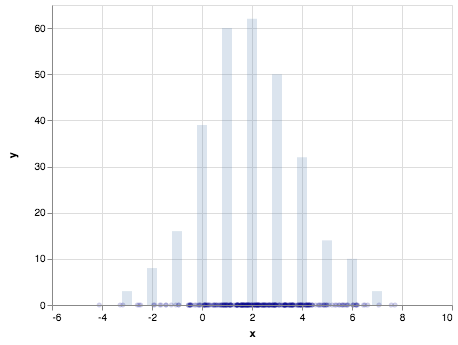

In [1]:
import numpy as np
from helper import *


%load_ext autoreload
%autoreload 2


mu, sigma = 2.5, 2 # mean and standard deviation
N = 300
nbins = 10

s =  np.random.normal(mu, sigma, size=N)

values, bins = np.histogram(s, bins=np.arange(-3, nbins + 1))

histogram = make_bar_chart(size=10, opacity=.2, X=bins, Y=values)

x_points = make_scatter_chart(size=10, opacity=.2, X=s, Y=np.zeros(len(s)))

histogram + x_points

Each little blue dot along the x-axis is some datapoint $x_i$. If we square each point, and display the original point $x_i$ along the x-axis and its square $x_i^2$ along the y-axis, we have a line of red dots along the curve of $X^2$. I show each $x_i$ with a little black line leading to the corresponding value of $x_i^2$.

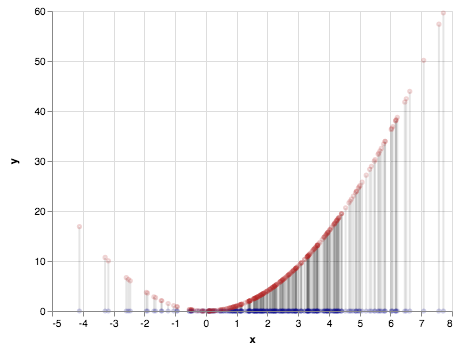

In [2]:
x2_points = make_scatter_chart(size=10, opacity=.2, X=s, Y=[i ** 2 for i in s], color="firebrick")

guide_lines = make_guide_lines(s)

functools.reduce(lambda a,b : a+b,guide_lines + [x_points  + x2_points])

Each black dot represents the value of some blue $x$, squared. Because each $x$ has equal probability mass (i.e. $\frac{1}{|S|}$) if we simple average the y-coordinates of the black dots, we get the expected value of $X^2$. That is, we get $\mathbb{E}[X^2]$. We show this as a black dot on the chart. We can also plot the expected value of each $x_i$ as a blue dot. This is $\mathbb{E}[X]$.

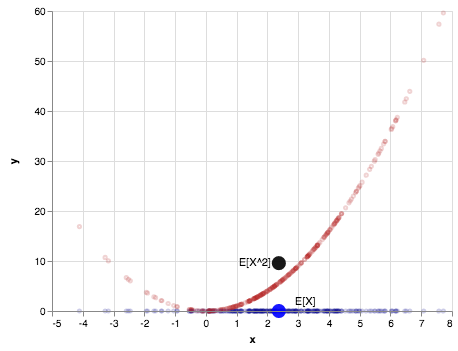

In [4]:
expectedx2 = np.mean([i ** 2 for i in s])


dt = make_altair_object_labels(X=[np.mean(s)], Y=[expectedx2], L=["E[X^2]"])
                                
expected_x2 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object_labels(X=[np.mean(s)], Y=[0], L=["E[X]"])
                                
expected_x = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="blue", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

text = expected_x2.mark_text(
    align='right',
    baseline='middle',
    dx=7,
    xOffset=-15,    
).encode(
    text='label:N'
)


text2 = expected_x.mark_text(
    align='left',
    baseline='bottom',
    yOffset=-4,
    dx=16
).encode(
    text='label:N'
)

x_points + expected_x2 + text + expected_x + text2 + x2_points

If we square the expected value of the Xs we get $\mathbb{E}[X]^2$. We show this as another blue dot. 

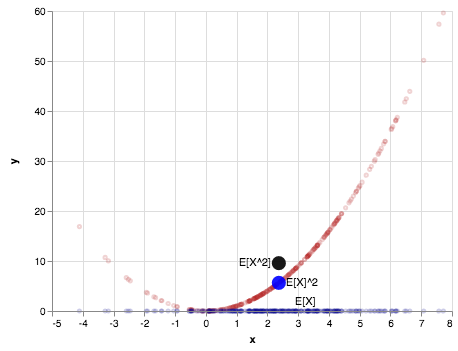

In [9]:
dt = make_altair_object_labels(X=[np.mean(s)], Y=[np.mean(s)** 2], L=["E[X]^2"])

c7 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="blue", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

text7 = c7.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='label:N'
)
x2_points + expected_x2 + text + text2 + c7 +  text7 + x_points

The distance between $\mathbb{E}[X^2]$ and $\mathbb{E}[X]^2$ is $\mathbb{E}[X^2]$ - $\mathbb{E}[X]^2$, the variance!

Because $\mathbb{E}[X^2]$ is always above the black squares line, this also doubles as a visual proof that the variance is always non-negative. (See also this [awesome visual proof](http://mark.reid.name/blog/behold-jensens-inequality.html) of Jensen's Inequality, which gave me the idea for this post).


### Plowing through the algebra 

This post is devoted to providing a visual intution for the alternate definition of variance. If you are curious about the algebra behind the definition, here is a detailed derivation as well.

Starting from the definition and expanding the square we have

$$Var(X) = \mathbb{E}[(x - \mathbb{E}[X])^2]$$

$$Var(X) = \mathbb{E}[X^2 - 2XE[X] + \mathbb{E}[X]^2]$$

From linearity of expectation we have:

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[2XE[X]] +  \mathbb{E}[\mathbb{E}[X]^2]$$

We can pull out the constants 2 and $\mathbb{E}[X]$ from the expectation in the middle term to get:

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X]\mathbb{E}E[X] +  \mathbb{E}[\mathbb{E}[X^2]$$

We can also express the middle term as $2\mathbb{E}[X^2]$ to get

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[X^2] -  \mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2] -   \mathbb{E}[X^2]$$